In [1]:
#importing needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # to avoid any warning in the code
pd.set_option('display.max_columns' , None) # Set max columns can be displayed to none to show all columns of our data

In [2]:
df = pd.read_csv('laptop_prices.csv') # importing our dataset
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

## First look:
> In this section, I will provide my intersets about this data for the first look
- I think I can get screen resolution from screen width and screen height
- Also I can get total storage of the laptop form primary and secondary storages
- I think if I see retina display is by only apple laptops or not
- Also I want to see what the most popular OS in our dataset 
- Also I want to see what the company have the light laptops 
- What is the most inches of laptops comapany
- Percentage of touch screen laptops
- The most CPU company used 
- The most CPU model used for each CPU company
- The most CPU frequency in our data

First thing I want to get screen resolution and total storage

In [4]:
#resolution
df['ScreenRes']= df['ScreenW'].astype(str) + 'x' + df['ScreenH'].astype(str)

In [5]:
df['ScreenRes'].sample(5)

765      1366x768
399     2560x1440
625     1920x1080
21      1920x1080
1041     1366x768
Name: ScreenRes, dtype: object

Ok now I want to get total storage from primary and secondary storages

In [6]:
df['Storage'] = df['PrimaryStorage'] + df['SecondaryStorage']

In [7]:
df['Storage']

0        128
1        128
2        256
3        512
4        256
        ... 
1270     128
1271     512
1272      64
1273    1024
1274     500
Name: Storage, Length: 1275, dtype: int64

In [8]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,ScreenRes,Storage
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,2560x1600,128
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,1440x900,128
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620,1920x1080,256
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455,2880x1800,512
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,2560x1600,256


Ok now I want to order Storage column to be before primary and secondary storages and resolution before screen width and height

In [9]:
columns = list(df.columns)
columns

['Company',
 'Product',
 'TypeName',
 'Inches',
 'Ram',
 'OS',
 'Weight',
 'Price_euros',
 'Screen',
 'ScreenW',
 'ScreenH',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'CPU_company',
 'CPU_freq',
 'CPU_model',
 'PrimaryStorage',
 'SecondaryStorage',
 'PrimaryStorageType',
 'SecondaryStorageType',
 'GPU_company',
 'GPU_model',
 'ScreenRes',
 'Storage']

In [10]:
(columns.index('PrimaryStorage'),
 columns.index('ScreenW'))

(17, 9)

In [11]:
ordered_Columns= []
for index,col in enumerate(columns):
    """This for loop check if index is screen width or primary storage and put screen resolution and storage columns in this place"""
    if index == columns.index('PrimaryStorage'):
        ordered_Columns.append('Storage')
        ordered_Columns.append('PrimaryStorage')
    elif index == columns.index('ScreenW'):
        ordered_Columns.append('ScreenRes')
        ordered_Columns.append('ScreenW')
    elif col not in ['Storage' ,'ScreenRes' , 'PrimaryStorage']:ordered_Columns.append(col)


In [12]:
ordered_Columns

['Company',
 'Product',
 'TypeName',
 'Inches',
 'Ram',
 'OS',
 'Weight',
 'Price_euros',
 'Screen',
 'ScreenRes',
 'ScreenW',
 'ScreenH',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'CPU_company',
 'CPU_freq',
 'CPU_model',
 'Storage',
 'PrimaryStorage',
 'SecondaryStorage',
 'PrimaryStorageType',
 'SecondaryStorageType',
 'GPU_company',
 'GPU_model']

In [13]:
df = df[ordered_Columns] #apply our changes

In [14]:
df.sample(10)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
894,MSI,GS73VR Stealth,Gaming,17.3,16,Windows 10,2.43,2649.00,4K Ultra HD,3840x2160,3840,2160,No,Yes,No,Intel,2.6,Core i7 6700HQ,2560,512,2048,SSD,HDD,Nvidia,GeForce GTX 1060
121,MSI,GS63VR 7RG,Gaming,15.6,16,Windows 10,1.80,2241.50,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.8,Core i7 7700HQ,2304,256,2048,SSD,HDD,Nvidia,GeForce GTX 1070
86,HP,Pavilion 15-CK000nv,Ultrabook,15.6,8,Windows 10,1.83,699.00,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,1.8,Core i7 8550U,256,256,0,SSD,No,Nvidia,GeForce GTX 940MX
286,Lenovo,Thinkpad T570,Notebook,15.6,8,Windows 10,1.95,1097.00,Full HD,1920x1080,1920,1080,No,Yes,No,Intel,2.7,Core i7 7500U,256,256,0,SSD,No,Intel,HD Graphics 630
502,Lenovo,Yoga 920-13IKB,2 in 1 Convertible,13.9,8,Windows 10,1.40,1599.00,Full HD,1920x1080,1920,1080,Yes,Yes,No,Intel,1.6,Core i5 8250U,256,256,0,SSD,No,Intel,UHD Graphics 620
275,Dell,Inspiron 5567,Notebook,15.6,12,Windows 10,2.30,713.07,Standard,1366x768,1366,768,No,No,No,Intel,2.7,Core i7 7500U,1024,1024,0,HDD,No,Intel,HD Graphics 620
24,HP,15-BS101nv (i7-8550U/8GB/256GB/FHD/W10),Ultrabook,15.6,8,Windows 10,1.91,659.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,1.8,Core i7 8550U,256,256,0,SSD,No,Intel,HD Graphics 620
420,Lenovo,Yoga 720-15IKB,2 in 1 Convertible,15.6,16,Windows 10,2.00,1899.00,4K Ultra HD,3840x2160,3840,2160,Yes,Yes,No,Intel,2.8,Core i7 7700HQ,512,512,0,SSD,No,Nvidia,GeForce GTX 1050
209,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,8,Windows 10,2.20,597.00,Standard,1366x768,1366,768,No,No,No,Intel,2.5,Core i5 7200U,256,256,0,SSD,No,Intel,HD Graphics 620
1054,Dell,XPS 13,Ultrabook,13.3,16,Windows 10,1.20,2254.00,Quad HD+,3200x1800,3200,1800,Yes,No,No,Intel,2.7,Core i7 7500U,1024,1024,0,SSD,No,Intel,HD Graphics 620


I want also to make new column for secondarystorage If there are or not

In [15]:
# I think I can get our information from secondary storage type and socondary storage
df.loc[df['SecondaryStorage'] == 0].shape[0] # length of all laptops haven't secondary storage

1067

In [16]:
df.loc[df['SecondaryStorageType'] == 'No'].shape[0]
"""That's very good two columns are the same value so I will use secondary storage type column"""

"That's very good two columns are the same value so I will use secondary storage type column"

In [17]:
def secondary_storage(value):
    if value != 'No':return True
    else:return False
df['SecondaryStorage?'] = [secondary_storage(v) for v in df['SecondaryStorageType']]

In [18]:
df.sample(10)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,SecondaryStorage?
1222,HP,15-bw009nv (A12-9720P/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.10,529.00,Full HD,1920x1080,1920,1080,No,No,No,AMD,2.7,A12-Series 9720P,1024,1024,0,HDD,No,AMD,Radeon 530,False
360,HP,250 G6,Notebook,15.6,4,Windows 10,1.86,439.00,Standard,1366x768,1366,768,No,No,No,Intel,2.0,Core i3 6006U,500,500,0,HDD,No,Intel,HD Graphics 520,False
54,Acer,Aspire 3,Notebook,15.6,4,Windows 10,2.40,384.00,Standard,1366x768,1366,768,No,No,No,Intel,2.4,Core i3 7100U,1024,1024,0,HDD,No,Intel,HD Graphics 620,False
913,HP,ProBook 450,Notebook,15.6,8,Windows 10,2.04,1018.99,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.7,Core i7 7500U,256,256,0,SSD,No,Nvidia,GeForce 930MX,False
293,Dell,XPS 15,Notebook,15.6,8,Windows 10,2.00,1829.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.8,Core i7 7700HQ,256,256,0,SSD,No,Nvidia,GeForce GTX 1050,False
947,Lenovo,IdeaPad 310-15IKB,Notebook,15.6,8,No OS,2.20,685.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.7,Core i7 7500U,1024,1024,0,HDD,No,Nvidia,GeForce 920MX,False
296,Acer,Aspire A715-71G,Notebook,15.6,8,Linux,2.50,979.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.8,Core i7 7700HQ,256,256,0,SSD,No,Nvidia,GeForce GTX 1050 Ti,False
216,Lenovo,IdeaPad 320-17IKB,Notebook,17.3,8,No OS,2.80,589.00,Standard,1600x900,1600,900,No,No,No,Intel,2.5,Core i5 7200U,1024,1024,0,HDD,No,Nvidia,GeForce GTX 940MX,False
219,Dell,Inspiron 5379,2 in 1 Convertible,13.3,16,Windows 10,1.62,1279.00,Full HD,1920x1080,1920,1080,Yes,No,No,Intel,1.8,Core i7 8550U,512,512,0,SSD,No,Intel,UHD Graphics 620,False
330,MSI,GL72M 7REX,Gaming,17.3,8,Windows 10,2.70,1199.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.8,Core i7 7700HQ,1280,256,1024,SSD,HDD,Nvidia,GeForce GTX 1050 Ti,True


ok now I want to order primary storage type to be before primary storage and secondary storage ? to be before primary storage type

In [19]:
ordered_Columns = []
columns = df.columns.to_list()
for i , col in enumerate(columns):
    """In this for loop I'm ordered some storage columns"""
    if i == columns.index('SecondaryStorage'):ordered_Columns.append('PrimaryStorageType') ; \
        ordered_Columns.append('SecondaryStorage?'); \
        ordered_Columns.append('SecondaryStorage')
    elif col not in ['SecondaryStorage?' , 'PrimaryStorageType']:ordered_Columns.append(col)
ordered_Columns

['Company',
 'Product',
 'TypeName',
 'Inches',
 'Ram',
 'OS',
 'Weight',
 'Price_euros',
 'Screen',
 'ScreenRes',
 'ScreenW',
 'ScreenH',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'CPU_company',
 'CPU_freq',
 'CPU_model',
 'Storage',
 'PrimaryStorage',
 'PrimaryStorageType',
 'SecondaryStorage?',
 'SecondaryStorage',
 'SecondaryStorageType',
 'GPU_company',
 'GPU_model']

that's awesome

In [20]:
df = df[ordered_Columns]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [22]:
df.sample(10)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenRes,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,Storage,PrimaryStorage,PrimaryStorageType,SecondaryStorage?,SecondaryStorage,SecondaryStorageType,GPU_company,GPU_model
971,Dell,Latitude E7470,Ultrabook,14.0,8,Windows 10,1.50,1962.98,Standard,2560x1440,2560,1440,Yes,No,No,Intel,2.6,Core i7 6600U,256,256,SSD,False,0,No,Intel,HD Graphics 520
228,Asus,K756UX-T4340T (i5-7200U/8GB/500GB,Notebook,17.3,8,Windows 10,2.69,891.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,756,256,SSD,True,500,HDD,Nvidia,GeForce GTX 950M
547,Lenovo,V310-15ISK (i5-6200U/4GB/1TB/FHD/No,Notebook,15.6,4,No OS,2.15,462.35,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.3,Core i5 6200U,1024,1024,HDD,False,0,No,Intel,HD Graphics 520
211,Asus,ROG GL703VD-GC028T,Gaming,17.3,16,Windows 10,2.90,1407.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.8,Core i7 7700HQ,1280,256,SSD,True,1024,HDD,Nvidia,GeForce GTX 1050
77,Dell,Inspiron 5570,Notebook,15.6,8,Windows 10,2.02,855.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,1.8,Core i7 8550U,1152,128,SSD,True,1024,HDD,Intel,UHD Graphics 620
511,Acer,Aspire A515-51G,Notebook,15.6,4,Windows 10,2.20,639.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.7,Core i7 7500U,500,500,HDD,False,0,No,Nvidia,GeForce 940MX
74,Acer,Aspire E5-475,Notebook,14.0,8,Windows 10,2.10,389.00,Standard,1366x768,1366,768,No,No,No,Intel,2.0,Core i3 6006U,1024,1024,HDD,False,0,No,Intel,HD Graphics 520
256,HP,15-BW094nd (A6-9220/8GB/128GB/W10),Notebook,15.6,8,Windows 10,1.91,445.90,Standard,1366x768,1366,768,No,No,No,AMD,2.5,A6-Series A6-9220,128,128,SSD,False,0,No,AMD,Radeon R4 Graphics
1131,Lenovo,ThinkPad P40,2 in 1 Convertible,14.0,8,Windows 7,1.80,2050.38,Full HD,1920x1080,1920,1080,Yes,Yes,No,Intel,2.6,Core i7 6600U,512,512,SSD,False,0,No,Nvidia,Quadro M500M
998,Asus,Rog GL553VE-DS74,Gaming,15.6,16,Windows 10,2.50,1799.00,Full HD,1920x1080,1920,1080,No,No,No,Intel,2.8,Core i7 7700HQ,1280,256,SSD,True,1024,HDD,Nvidia,GeForce GTX 1050 Ti


Ok now let's strat with EDA

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [24]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


ok Firstly I want to see count of laptops for each comapny

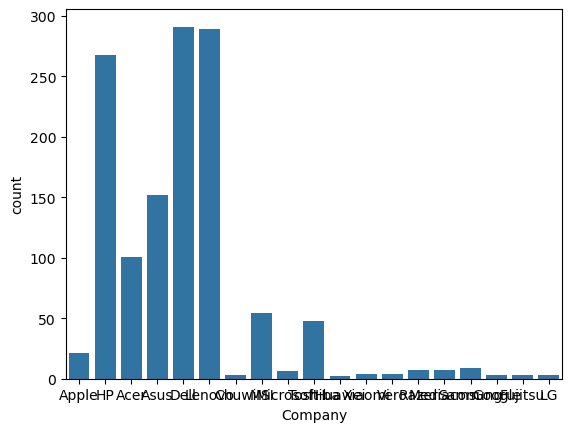

In [25]:
sns.countplot(x='Company' , data=df);
plt.show()

Ok there are overplotting so I should handle that by sorting only most 10 companies

In [26]:
top_10_companies = df['Company'].value_counts(sort=True , ascending=False).head(10)
top_10_companies# Ok that's good

Company
Dell        291
Lenovo      289
HP          268
Asus        152
Acer        101
MSI          54
Toshiba      48
Apple        21
Samsung       9
Mediacom      7
Name: count, dtype: int64

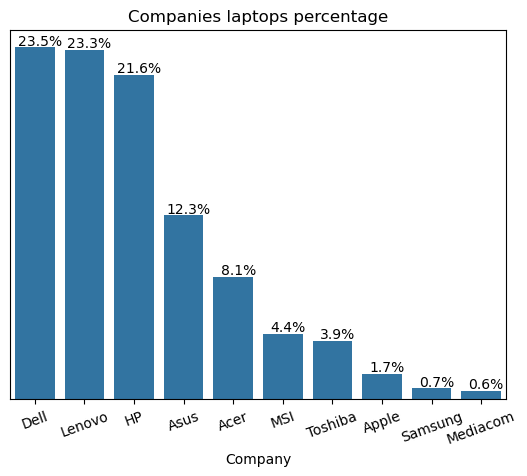

In [27]:
ax = sns.barplot(x=top_10_companies.index, y=top_10_companies.values)
for p in ax.patches:
    plt.text(p.get_x()+.5, p.get_height()+2 , # x , y
             str(
                 round(
                    (int(p.get_height()) / top_10_companies.sum())*100
                    ,1)
                ) 
             +'%',#percentage
            horizontalalignment='center' # centerting text
            )
plt.xticks(rotation=20)
ax.yaxis.set_visible(False)
plt.title('Companies laptops percentage')
plt.show()

In this chart we also see the percentage are very similiar in top 2 so I can say Dell and Lenovo are the most two companies make laptops in our data and we also see there are big difference between top 1 and top 10 so I think I should use mean in any column to get good result

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenRes             1275 non-null   object 
 10  ScreenW               1275 non-null   int64  
 11  ScreenH               1275 non-null   int64  
 12  Touchscreen           1275 non-null   object 
 13  IPSpanel              1275 non-null   object 
 14  RetinaDisplay         1275 non-null   object 
 15  CPU_company          

In [29]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,Storage,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,620.586667,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,482.064003,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,500.000000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,1024.000000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2560.000000,2048.000000,2048.000000


now I want to see type name column

In [30]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

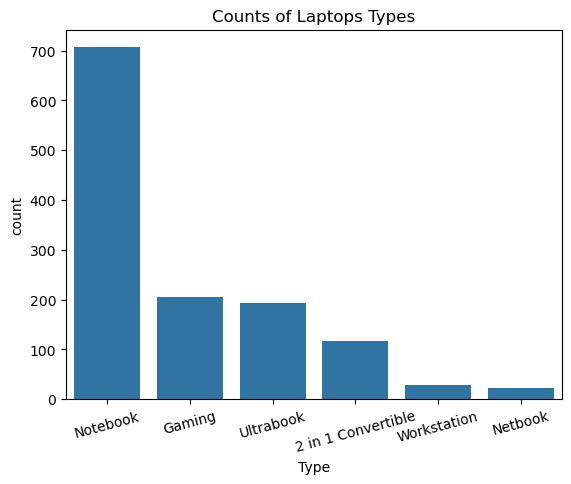

In [31]:
sns.countplot(x='TypeName' , data=df,
              order=df['TypeName'].value_counts(ascending=False, sort=True).index)
plt.xticks(rotation = 15)
plt.title('Counts of Laptops Types')
plt.xlabel('Type')
plt.show()

In this chart notebook laptops are the famouse one in our data with big difference between it and top 2(gaming) and Gaming and ultrabook are almost similiar and also workstation and netbook are very rare in our data, 2 in 1 laptops(laptops that can you convert it to tablet)

> Ok I want to plot disterbution of inches

In [32]:
df['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

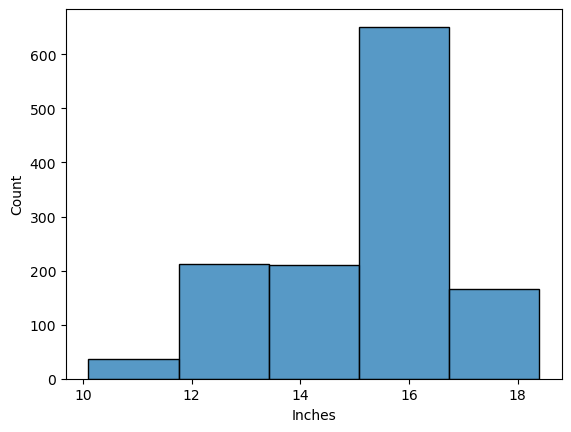

In [33]:
sns.histplot(x='Inches' , data=df, bins=5)
plt.show()

In this chart I decreased number of bins to be 5 because of smaller range of inches,

we also see 15-17 inch are the most famous
14 and 12 are very similiar to each other

> now I want to see range of inches mean

In [34]:
inches_means = []
for _ in range(10_000):
    bootsample = df['Inches'].sample(320 , replace=True)
    inches_means.append(bootsample.mean())

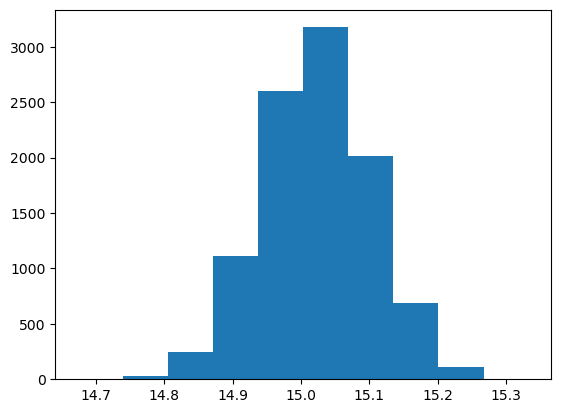

In [35]:
plt.hist(inches_means);
plt.show()

Ok so I will make 95% confidence level in my confidence interval

In [36]:
round(np.percentile(inches_means , 2.5),1) , round(np.percentile(inches_means , 97.5),1)

(np.float64(14.9), np.float64(15.2))

so 95% Inches mean is between 14.9 - 15.2 inch